## 3.3 Data Research

#### 3.3.1 merge data and get price(rent)_per_m2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

# 读取并整合二手房数据
esf_df = pd.concat(pd.read_excel('esf_data.xlsx', sheet_name=None), ignore_index=True)
esf_df.rename(columns={'blocks': 'block'}, inplace=True) # 和rent_df统一下列名嘻嘻
print(esf_df.head(5))

# 读取并整合租金数据  
rent_df = pd.concat(pd.read_excel('rent_data.xlsx', sheet_name=None), ignore_index=True)
rent_df['rent_per_m2'] = rent_df['rent']/rent_df['area']
print(rent_df.head(5))

    price    area   price_per_m2 block
0  1499.0  151.00   99271.523179    万柳
1  1550.0  142.54  108741.405921    万柳
2  2400.0  114.59  209442.359717    万柳
3  1499.0  151.00   99271.523179    万柳
4  2100.0  150.21  139804.274016    万柳
     rent  area block  rent_per_m2
0  138000   330    万柳   418.181818
1   80000   416    万柳   192.307692
2   58000   468    万柳   123.931624
3  120000   381    万柳   314.960630
4   58000   307    万柳   188.925081


#### 3.3.2 describe data

In [2]:
esf_df.describe()

,price,area,price_per_m2
count,2903.000000,2903.000000,2903.000000
mean,2230.192460,163.310362,125062.965584
std,1800.591224,76.537235,41382.392063
min,179.000000,26.500000,32368.896926
25%,1263.000000,117.570000,99340.964986
50%,1790.000000,155.000000,118178.658325
75%,2480.000000,201.640000,139816.196685
max,19400.000000,745.000000,312685.533347


In [3]:
esf_df[['block','price_per_m2']].groupby('block').describe()

price_per_m2                                                            \
             count           mean           std           min            25%   
block                                                                          
万柳          1200.0  153799.965957  44526.717322  61626.016260  128205.128205   
世纪城         1198.0  114207.101152  18075.291011  64885.496183  102136.135988   
北太平庄         197.0   88429.373414  21193.697032  32368.896926   78175.519630   
苏州桥          308.0   78756.935719  13557.023020  44927.323447   70189.362295   

                                                    
                 50%            75%            max  
block                                               
万柳     141870.967742  167500.000000  312685.533347  
世纪城    110414.673046  125853.658537  183346.594251  
北太平庄    87341.329917  102443.749069  145405.819296  
苏州桥     78821.656051   85816.634137  152985.074627

In [4]:
rent_df.describe()

,rent,area,rent_per_m2
count,3852.000000,3852.000000,3852.000000
mean,20332.516355,128.123572,148.103432
std,23255.278073,92.367234,61.350584
min,1700.000000,9.000000,40.579710
25%,7500.000000,61.000000,111.896400
50%,13500.000000,107.000000,132.743363
75%,22000.000000,171.000000,160.655738
max,160000.000000,1501.000000,448.916409


In [5]:
rent_df[['block','rent_per_m2']].groupby('block').describe()

rent_per_m2                                                            \
            count        mean        std        min         25%         50%   
block                                                                         
万柳         1200.0  177.103331  76.223515  86.608927  130.864198  151.898734   
世纪城        1200.0  119.804970  31.836083  79.754601  100.000000  108.843537   
北太平庄        252.0  138.956170  31.681913  88.495575  118.181818  132.075472   
苏州桥        1200.0  149.322920  58.250425  40.579710  114.035088  136.000000   

                               
              75%         max  
block                          
万柳     179.487179  448.916409  
世纪城    133.891213  372.340426  
北太平庄   150.000000  291.666667  
苏州桥    166.666667  366.666667

#### 3.3.3 find outliers(IQR)

In [6]:
def detect_outliers_iqr(df, column):
    """对数据整体使用IQR方法检测异常值"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("二手房数据异常值检测:")
esf_outliers, esf_lower, esf_upper = detect_outliers_iqr(esf_df, 'price_per_m2')
print(f"异常值范围: [{esf_lower:.2f}, {esf_upper:.2f}]")
print(f"异常值数量: {len(esf_outliers)}")
print("异常值数据:")
print(esf_outliers)

print("\n租金数据异常值检测:")
rent_outliers, rent_lower, rent_upper = detect_outliers_iqr(rent_df, 'rent_per_m2')
print(f"异常值范围: [{rent_lower:.2f}, {rent_upper:.2f}]")
print(f"异常值数量: {len(rent_outliers)}")
print("异常值数据:")
print(rent_outliers)

二手房数据异常值检测:
异常值范围: [38628.12, 200529.04]
异常值数量: 217
异常值数据:
       price    area   price_per_m2 block
2     2400.0  114.59  209442.359717    万柳
6     5900.0  266.79  221147.719180    万柳
7     8500.0  395.00  215189.873418    万柳
9     8950.0  395.00  226582.278481    万柳
15    8600.0  395.00  217721.518987    万柳
...      ...     ...            ...   ...
1594   179.0   55.30   32368.896926  北太平庄
1603   179.0   54.58   32795.895933  北太平庄
1684   179.0   55.30   32368.896926  北太平庄
1702   279.0   72.54   38461.538462  北太平庄
1703   179.0   54.58   32795.895933  北太平庄

[217 rows x 4 columns]

租金数据异常值检测:
异常值范围: [38.76, 233.79]
异常值数量: 307
异常值数据:
        rent  area block  rent_per_m2
0     138000   330    万柳   418.181818
3     120000   381    万柳   314.960630
5     136000   330    万柳   412.121212
7     130000   330    万柳   393.939394
9      88000   300    万柳   293.333333
...      ...   ...   ...          ...
3330   70000   188   世纪城   372.340426
3352   70000   188   世纪城   372.340426
3470   70000   188

In [7]:
def detect_outliers_iqr_by_block(df, column, block_column):
    """对每个区块使用IQR方法检测异常值"""
    outliers_list = []
    bounds_info = {}
    
    # 获取所有区块
    blocks = df[block_column].unique()
    
    for block in blocks:
        block_data = df[df[block_column] == block]
        
        if len(block_data) < 4:  # 如果数据太少，跳过异常值检测
            print(f"区块 {block} 数据量不足 ({len(block_data)} 条)，跳过异常值检测")
            continue
            
        Q1 = block_data[column].quantile(0.25)
        Q3 = block_data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # 如果IQR为0，使用标准差方法
        if IQR == 0:
            mean = block_data[column].mean()
            std = block_data[column].std()
            lower_bound = mean - 2 * std
            upper_bound = mean + 2 * std
        else:
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
        
        block_outliers = block_data[(block_data[column] < lower_bound) | (block_data[column] > upper_bound)]
        
        if not block_outliers.empty:
            outliers_list.append(block_outliers)
        
        bounds_info[block] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outlier_count': len(block_outliers)
        }
    
    # 合并所有异常值
    if outliers_list:
        all_outliers = pd.concat(outliers_list, ignore_index=True)
    else:
        all_outliers = pd.DataFrame()
    
    return all_outliers, bounds_info

# 检测二手房数据的异常值（按区块）
print("二手房数据异常值检测（按区块）:")
esf_outliers_by_block, esf_bounds_info = detect_outliers_iqr_by_block(esf_df, 'price_per_m2', 'block')

print(f"异常值总数: {len(esf_outliers_by_block)}")
print("\n各区块异常值信息:")
for block, info in esf_bounds_info.items():
    print(f"{block}: 异常值范围 [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}], 异常值数量: {info['outlier_count']}")

if not esf_outliers_by_block.empty:
    print("\n异常值数据:")
    print(esf_outliers_by_block)
else:
    print("\n无异常值")

# 检测租金数据的异常值（按区块）
print("\n" + "=" * 50)
print("租金数据异常值检测（按区块）:")
rent_outliers_by_block, rent_bounds_info = detect_outliers_iqr_by_block(rent_df, 'rent_per_m2', 'block')

print(f"异常值总数: {len(rent_outliers_by_block)}")
print("\n各区块异常值信息:")
for block, info in rent_bounds_info.items():
    print(f"{block}: 异常值范围 [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}], 异常值数量: {info['outlier_count']}")

if not rent_outliers_by_block.empty:
    print("\n异常值数据:")
    print(rent_outliers_by_block)
else:
    print("\n无异常值")

二手房数据异常值检测（按区块）:
异常值总数: 179

各区块异常值信息:
万柳: 异常值范围 [69262.82, 226442.31], 异常值数量: 131
苏州桥: 异常值范围 [46748.45, 109257.54], 异常值数量: 8
北太平庄: 异常值范围 [41773.18, 138846.09], 异常值数量: 13
世纪城: 异常值范围 [66559.85, 161429.94], 异常值数量: 27

异常值数据:
       price    area   price_per_m2 block
0     8950.0  395.00  226582.278481    万柳
1    19400.0  745.00  260402.684564    万柳
2    12500.0  545.64  229088.776483    万柳
3     9300.0  381.00  244094.488189    万柳
4     9800.0  375.00  261333.333333    万柳
..       ...     ...            ...   ...
174   8000.0  494.34  161831.937533   世纪城
175   3100.0  188.08  164823.479370   世纪城
176   1030.0  156.39   65860.988554   世纪城
177   5300.0  289.07  183346.594251   世纪城
178   8000.0  494.34  161831.937533   世纪城

[179 rows x 4 columns]

租金数据异常值检测（按区块）:
异常值总数: 314

各区块异常值信息:
万柳: 异常值范围 [57.93, 252.42], 异常值数量: 119
苏州桥: 异常值范围 [35.09, 245.61], 异常值数量: 139
北太平庄: 异常值范围 [70.45, 197.73], 异常值数量: 16
世纪城: 异常值范围 [49.16, 184.73], 异常值数量: 40

异常值数据:
       rent  area block  rent_per_m2
0    138000

#### 3.3.4 compute price_to_rent_ratio for each block

In [8]:
esf_median = esf_df.groupby('block')['price_per_m2'].median()
rent_median = rent_df.groupby('block')['rent_per_m2'].median()

price_rent_ratio = {}
for block in esf_median.index:
    if block in rent_median.index:
        ratio = esf_median[block] / rent_median[block]
        price_rent_ratio[block] = ratio

print('直接使用数据中位数')
print('='*50)
print('各区块二手房价（元/平方）中位数:')
for block, price in esf_median.items():
    print(f"{block}: {price:.2f}")
print('='*50)
print('各区块租金（元/平方）中位数:')
for block, rent in rent_median.items():
    print(f"{block}: {rent:.2f}")
print('='*50)
print("各区块价格租金比 (月):")
for block, ratio in price_rent_ratio.items():
    print(f"{block}: {ratio:.2f}")

直接使用数据中位数
各区块二手房价（元/平方）中位数:
万柳: 141870.97
世纪城: 110414.67
北太平庄: 87341.33
苏州桥: 78821.66
各区块租金（元/平方）中位数:
万柳: 151.90
世纪城: 108.84
北太平庄: 132.08
苏州桥: 136.00
各区块价格租金比 (月):
万柳: 933.98
世纪城: 1014.43
北太平庄: 661.30
苏州桥: 579.57


#### 3.3.5 Figure A

In [9]:
def plot_price_rent_ratio(ratio_dict, title, color='darkblue', figsize=(5,3)):
    """
    ratio_dict: 价格租金比字典
    title: 图表标题
    color: 柱状图颜色
    figsize: 图表尺寸
    """
    plt.figure(figsize=figsize)
    blocks = list(ratio_dict.keys())
    ratios = list(ratio_dict.values())

    bars = plt.bar(blocks, ratios, color=color, alpha=0.7)
    
    # 添加数值标签
    for bar, ratio in zip(bars, ratios):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                 f'{ratio:.1f}', ha='center', va='bottom')
    
    plt.axhline(y=200, color='red', linestyle='--', linewidth=2, label='全球公平值 (200)')
    plt.ylabel('价格租金比 (月)', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend()
    plt.tight_layout()
    plt.show()

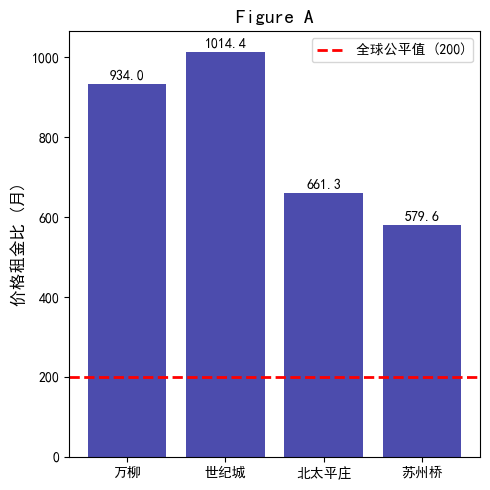

In [10]:
plot_price_rent_ratio(price_rent_ratio, 'Figure A', 'darkblue', (5,5))

## 3.4 Data Science Modeling

#### 3.4.1 model

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# 将区块名称编码为数值
le = LabelEncoder()

esf_df_encoded = esf_df.copy()
esf_df_encoded['block_encoded'] = le.fit_transform(esf_df['block'])

rent_df_encoded = rent_df.copy()
rent_df_encoded['block_encoded'] = le.fit_transform(rent_df['block'])

# 建立模型1: price_per_m2 = β0 + β1*m2 + β2*location + ε
print("模型1: 预测 price_per_m2")
X1 = esf_df_encoded[['area', 'block_encoded']]
y1 = esf_df_encoded['price_per_m2']

model1 = LinearRegression()
model1.fit(X1, y1)
y1_pred = model1.predict(X1)

r2_1 = r2_score(y1, y1_pred)
print(f"模型1 R²: {r2_1:.4f}")
print(f"模型1系数: 截距={model1.intercept_:.2f}, m2={model1.coef_[0]:.2f}, location={model1.coef_[1]:.2f}")

# 建立模型2: rent_per_m2 = β0 + β1*m2 + β2*location + ε
print("=" * 50)
print("模型2: 预测 rent_per_m2")
X2 = rent_df_encoded[['area', 'block_encoded']]
y2 = rent_df_encoded['rent_per_m2']

model2 = LinearRegression()
model2.fit(X2, y2)
y2_pred = model2.predict(X2)

r2_2 = r2_score(y2, y2_pred)
print(f"模型2 R²: {r2_2:.4f}")
print(f"模型2系数: 截距={model2.intercept_:.2f}, m2={model2.coef_[0]:.2f}, location={model2.coef_[1]:.2f}")

模型1: 预测 price_per_m2
模型1 R²: 0.5337
模型1系数: 截距=105793.80, m2=225.51, location=-20260.42
模型2: 预测 rent_per_m2
模型2 R²: 0.0580
模型2系数: 截距=124.21, m2=0.17, location=1.49


#### 3.4.2 prediction

In [17]:
esf_df_encoded['linear_pred_rentperm2'] = model2.predict(X1)
rent_df_encoded['linear_pred_priceperm2'] = model1.predict(X2)

esf_df_encoded['linear_pred_pricetorent'] = esf_df_encoded['price_per_m2']/esf_df_encoded['linear_pred_rentperm2']
rent_df_encoded['linear_pred_pricetorent'] = rent_df_encoded['linear_pred_priceperm2']/rent_df_encoded['rent_per_m2']

print('使用简单线性模型（model 1 &2 ）')
print('='*50)

price_rent_ratio_pred = pd.concat([esf_df_encoded[['block','linear_pred_pricetorent']], 
                               rent_df_encoded[['block','linear_pred_pricetorent']]
                              ]).groupby('block')['linear_pred_pricetorent'].median()
price_rent_ratio_pred = price_rent_ratio_pred.to_dict()

print('预测的各区块价格租金比 (月):')
for block, ratio in price_rent_ratio_pred.items():
    print(f"{block}: {ratio:.2f}")

使用简单线性模型（model 1 &2 ）
预测的各区块价格租金比 (月):
万柳: 926.33
世纪城: 844.11
北太平庄: 597.58
苏州桥: 465.08


#### 3.4.3 Figure B

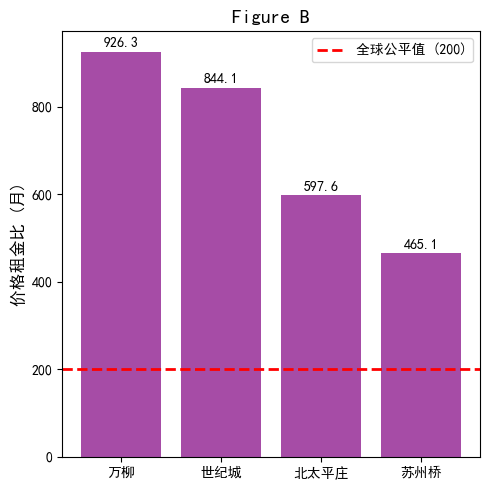

In [20]:
plot_price_rent_ratio(price_rent_ratio_pred, 'Figure B', 'purple', (5,5))

## 3.5 Data Science Modeling PRO MAX

#### 3.5.1 model PRO max

In [22]:
esf_df_encoded['area**2'] = esf_df_encoded['area'] ** 2
esf_df_encoded['area**3'] = esf_df_encoded['area'] ** 3
esf_df_encoded['interact'] = esf_df_encoded['area'] * esf_df_encoded['block_encoded']

rent_df_encoded['area**2'] = rent_df_encoded['area'] ** 2
rent_df_encoded['area**3'] = rent_df_encoded['area'] ** 3
rent_df_encoded['interact'] = rent_df_encoded['area'] * rent_df_encoded['block_encoded']

# 建立模型1+: price_per_m2 = β0 + β1*m2 + β2*location + β3*m2^2 + β4*m2^3 + β5*m2*location + ε
print("模型1+: PRO max 预测 price_per_m2")
X3 = esf_df_encoded[['area', 'block_encoded', 'area**2', 'area**3', 'interact']]
# X3 = esf_df_encoded[['area', 'block_encoded', 'area**2', 'interact']]
y3 = esf_df_encoded['price_per_m2']

model3 = LinearRegression()
model3.fit(X3, y3)
y3_pred = model3.predict(X3)

r2_3 = r2_score(y3, y3_pred)
print(f"R²: {r2_3:.4f}")
coef_df_3 = pd.DataFrame({
    'Variable': ['Intercept', 'area', 'location', 'area_squared', 'area_cubed', 'interact'],
    'Coefficient': [model3.intercept_] + list(model3.coef_)
})
print(coef_df_3)

# 建立模型2+: rent_per_m2 = β0 + β1*m2 + β2*location + β3*m2^2 + β4*m2^3 + β5*m2*location + ε
print("=" * 50)
print("模型2+: PRO max 预测 rent_per_m2")
X4 = rent_df_encoded[['area', 'block_encoded', 'area**2', 'area**3', 'interact']]
y4 = rent_df_encoded['rent_per_m2']

model4 = LinearRegression()
model4.fit(X4, y4)
y4_pred = model4.predict(X4)

r2_4 = r2_score(y4, y4_pred)
print(f"R²: {r2_4:.4f}")
coef_df_4 = pd.DataFrame({
    'Variable': ['Intercept', 'area', 'location', 'area_squared', 'area_cubed', 'interact'],
    'Coefficient': [model4.intercept_] + list(model4.coef_)
})
print(coef_df_4)

模型1+: PRO max 预测 price_per_m2
R²: 0.6410
       Variable    Coefficient
0     Intercept  113206.339258
1          area     -21.350450
2      location   -2675.297957
3  area_squared       1.535667
4    area_cubed      -0.001855
5      interact    -156.771330
模型2+: PRO max 预测 rent_per_m2
R²: 0.3342
       Variable   Coefficient
0     Intercept  1.078092e+02
1          area  3.097557e-01
2      location  3.431377e+01
3  area_squared  3.767621e-04
4    area_cubed -3.975275e-07
5      interact -4.760127e-01


#### 3.5.2 prediction PRO max

In [24]:
esf_df_encoded['non_linear_pred_rentperm2'] = model4.predict(X3)
rent_df_encoded['non_linear_pred_priceperm2'] = model3.predict(X4)

esf_df_encoded['non_linear_pred_pricetorent'] = esf_df_encoded['price_per_m2']/esf_df_encoded['non_linear_pred_rentperm2']
rent_df_encoded['non_linear_pred_pricetorent'] = rent_df_encoded['non_linear_pred_priceperm2']/rent_df_encoded['rent_per_m2']

print('使用加入非线性项的模型（model 1+ & 2+ ）')
print('='*50)

price_rent_ratio_pred_pro = pd.concat([esf_df_encoded[['block','non_linear_pred_pricetorent']], 
                               rent_df_encoded[['block','non_linear_pred_pricetorent']]
                              ]).groupby('block')['non_linear_pred_pricetorent'].median()
price_rent_ratio_pred_pro = price_rent_ratio_pred_pro.to_dict()

print("预测的各区块价格租金比 (月):")
for block, ratio in price_rent_ratio_pred_pro.items():
    print(f"{block}: {ratio:.2f}")

使用加入非线性项的模型（model 1+ & 2+ ）
预测的各区块价格租金比 (月):
万柳: 898.58
世纪城: 949.72
北太平庄: 702.76
苏州桥: 590.70


#### 3.5.3 Figure C

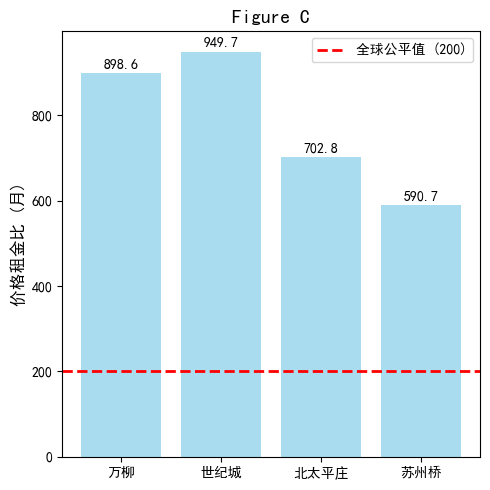

In [25]:
plot_price_rent_ratio(price_rent_ratio_pred_pro, 'Figure C', 'skyblue', (5,5))

### Conclusion

##### 在数据收集中，样本大小可能因区块而异（例如，某些区块的响应数据较少）。如果某个区块的样本大小较小，直接计算的中位数（方法一）可能不稳定，容易受异常值或随机波动的影响，导致估计不可靠。
##### 而模型预测方法（方法二和方法三）利用所有数据来估计参数构建了预测模型，通过预测的单位租金、单位房价信息扩充了样本（如单位房价样本量= 原样本量 ＋ 预测样本量 = esf_df数据量 + rent_df数据量），从而提供更稳定的估计。两相比较，方法三由于加入更多的变量，拟合效果更好（R²更高），可以认为预测结果更为可靠。

##### 因此我认为本次作业中，方法三（Figure C）的价格租金比更可信。